# Dummy Variables


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:

from google.colab import files  # Only used in Colab
import os

raw_data = pd.read_csv('1.03.+Dummies.csv')

In [ ]:
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


I create new variable, data equal to raw data. Then I will overwrite the series attendance in the data frame.

In [ ]:
data = raw_data.copy()

In [ ]:
data['Attendance']=data['Attendance'].map({'Yes':1,'No':0})

After executing this we see that we have successfully created a dummy variable.

In [ ]:
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [ ]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


Notice that the mean of the attended more than 75% is 0.46. The fact that the mean is less then 0.5, gives us the information that there are more zeros than ones. This implies that 46% of students have attended more than 75% of the lessons.
   

# Regression

In [ ]:
#dependent variable
y = data['GPA']
#independent variable
x1 = data[['SAT','Attendance']]

### Regression itself (stats model method for adding a constant. Then we can fit the regression and get the summary)

In [ ]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sat, 19 Jul 2025   Prob (F-statistic):           2.19e-15
Time:                        20:18:57   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our overall model is significant(F-statistic: 52.70, Prob(F-statistic: 2.19e-15.) The SAT score is significant and the dummy is significan(0.000 ) The adjusted R squared of this model is 0.555 which is a great improvement from what I got without attendance.(0.3999)   

The model becomes:

Did not attend(dummy = 0)
- GPA = 0.6439 + 0.0014 * SAT + 0.2226 * Dummy
- GPA = 0.6439 + 0.0014 * SAT + 0.2226 * 0
- GPA = 0.6439 + 0.0014 * SAT

Attended (dummy = 1)
- GPA = 0.6439 + 0.0014 * SAT + 0.2226 * Dummy
- GPA = 0.6439 + 0.0014 * SAT + 0.2226 * 1
- GPA = 0.8665 + 0.0014 * SAT

# Two equations Yhat_no & yhat_yes

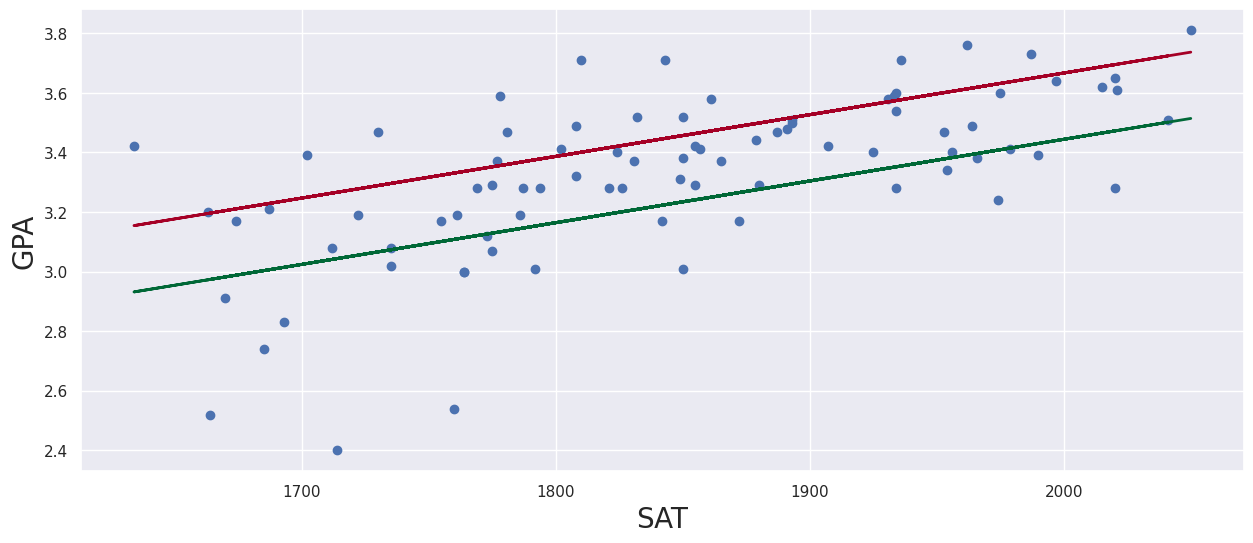

In [ ]:
plt.figure(figsize=(15, 6))
plt.scatter(data['SAT'],y)
yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = 0.8665 + 0.0014 * data['SAT']
fig = plt.plot(data['SAT'],yhat_no, lw = 2,c='#006837')
fig = plt.plot(data['SAT'],yhat_yes, lw = 2,c='#a50026')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

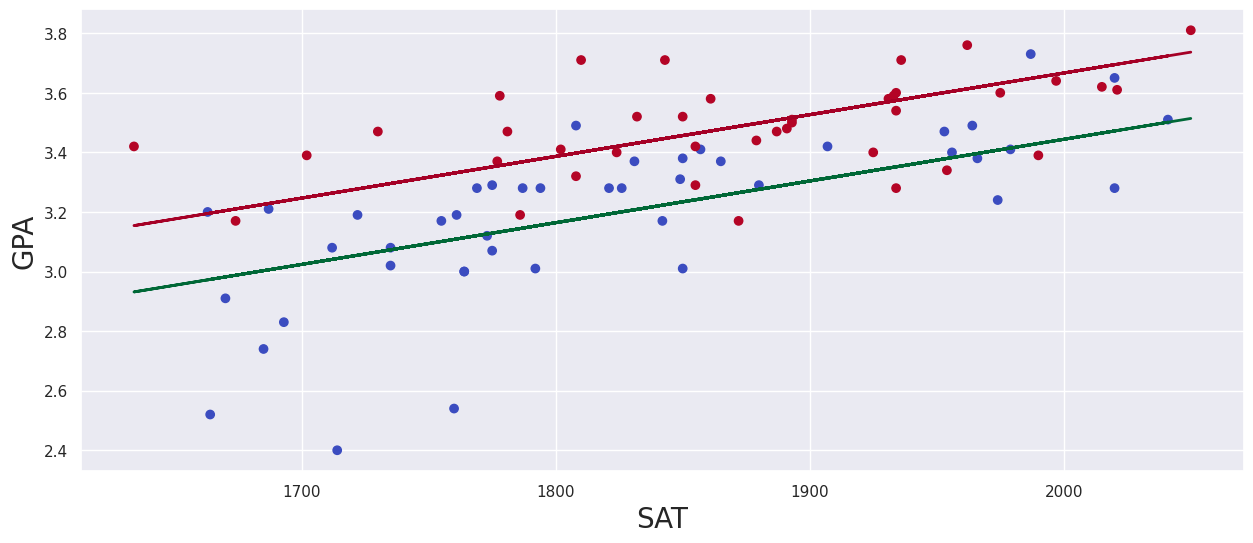

In [ ]:
plt.figure(figsize=(15, 6))
plt.scatter(data['SAT'],y,c=data['Attendance'],cmap='coolwarm')
yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = 0.8665 + 0.0014 * data['SAT']
fig = plt.plot(data['SAT'],yhat_no, lw = 2,c='#006837')
fig = plt.plot(data['SAT'],yhat_yes, lw = 2,c='#a50026')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

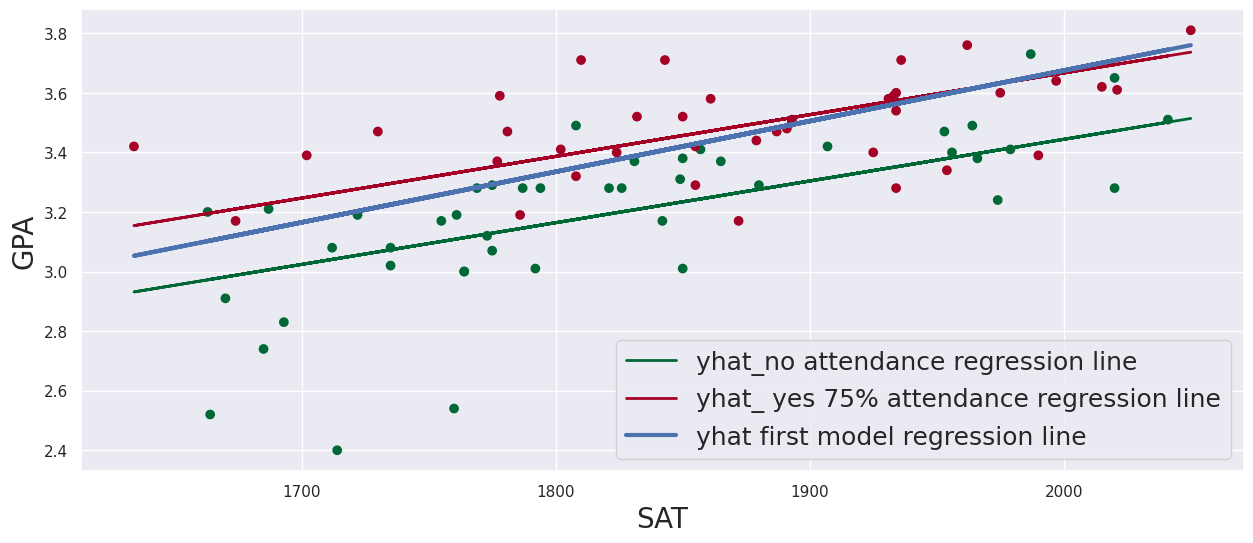

In [ ]:
plt.figure(figsize=(15, 6))
plt.scatter(data['SAT'],y,c=data['Attendance'],cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = 0.8665 + 0.0014 * data['SAT']
yhat_first_model = 0.0017 * data['SAT'] + 0.275
fig = plt.plot(data['SAT'],yhat_no, lw = 2,c='#006837', label = 'yhat_no attendance regression line')
fig = plt.plot(data['SAT'],yhat_yes, lw = 2,c='#a50026', label = 'yhat_ yes 75% attendance regression line')
fig = plt.plot(data['SAT'],yhat_first_model, lw = 3, c='#4C72B0',label = 'yhat first model regression line')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.legend(fontsize=18,loc='lower right')
plt.show()